# Modifying Rates

Sometimes we want to change the nuclei involved in rates to simplify our network.  Currently,
pynucastro supports changing the products.  Here's an example.

```{note}
A newer way to accomplish this is via the {py:obj}`ModifiedRate <pynucastro.rates.modified_rate.ModifiedRate>` class.  In the future, the {py:func}`modify_products <pynucastro.rates.rate.Rate.modify_products>` method
shown here may be removed.
```

In [1]:
import pynucastro as pyna

In [2]:
reaclib_library = pyna.ReacLibLibrary()

We want to model ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$ reactions.  There are 3 rates involved.

In [3]:
filter = pyna.RateFilter(reactants=["c12", "c12"])
mylib = reaclib_library.filter(filter)
mylib                       

C12 + C12 ⟶ He4 + Ne20         [Q =   4.62 MeV] (C12 + C12 --> He4 + Ne20 <reaclib_cf88>)
C12 + C12 ⟶ p + Na23           [Q =   2.24 MeV] (C12 + C12 --> p + Na23 <reaclib_cf88>)
C12 + C12 ⟶ n + Mg23           [Q =  -2.60 MeV] (C12 + C12 --> n + Mg23 <reaclib_cf88>)

The rate ${}^{12}\mathrm{C}({}^{12}\mathrm{C},n){}^{23}\mathrm{Mg}$ is quickly followed by ${}^{23}\mathrm{Mg}(n,\gamma){}^{24}\mathrm{Mg}$, so we want to modify that rate sequence to just be ${}^{12}\mathrm{C}({}^{12}\mathrm{C},\gamma){}^{24}\mathrm{Mg}$

In [4]:
r = mylib.get_rate_by_name("c12(c12,n)mg23")
r

C12 + C12 ⟶ n + Mg23

This has the Q value:

In [5]:
r.Q

-2.598

Now we modify it

In [6]:
r.modify_products("mg24")
r

C12 + C12 ⟶ Mg24 + 𝛾

and we see that the Q value has been updated to reflect the new endpoint

In [7]:
r.Q

13.933578000000125

Now let's build a network that includes the nuclei involved in our carbon burning.  We'll start by leaving off the ${}^{23}\mathrm{Mg}$

```{caution}
We we get the rate object from the library via {py:obj}`get_rate_by_name <pynucastro.rates.library.Library.get_rate_by_name>` (or any similar function), we are getting
a reference to the rate in the library, not a copy.  This means that our modification is reflected back in the
original library in memory.  Care needs to be taken (e.g. by making a copy or rereading the library) if you want
to access the original rate.
```

## Using our modified rate

In [8]:
mylib2 = reaclib_library.linking_nuclei(["p", "he4", "c12", "o16", "ne20", "na23", "mg24"])

Now we add in our modified rate

In [9]:
mylib2 += pyna.Library(rates=[r])

In [10]:
mylib2

3 He4 ⟶ C12 + 𝛾                [Q =   7.28 MeV] (3 He4 --> C12 <reaclib_fy05>)
C12 + He4 ⟶ O16 + 𝛾            [Q =   7.16 MeV] (C12 + He4 --> O16 <reaclib_nac2>)
C12 + C12 ⟶ He4 + Ne20         [Q =   4.62 MeV] (C12 + C12 --> He4 + Ne20 <reaclib_cf88>)
C12 + C12 ⟶ p + Na23           [Q =   2.24 MeV] (C12 + C12 --> p + Na23 <reaclib_cf88>)
C12 + C12 ⟶ Mg24 + 𝛾           [Q =  13.93 MeV] (C12 + C12 --> Mg24 <reaclib_cf88>)
O16 + He4 ⟶ Ne20 + 𝛾           [Q =   4.73 MeV] (O16 + He4 --> Ne20 <reaclib_co10>)
O16 + C12 ⟶ He4 + Mg24         [Q =   6.77 MeV] (O16 + C12 --> He4 + Mg24 <reaclib_cf88>)
Ne20 + He4 ⟶ Mg24 + 𝛾          [Q =   9.32 MeV] (Ne20 + He4 --> Mg24 <reaclib_il10>)
Na23 + p ⟶ He4 + Ne20          [Q =   2.38 MeV] (Na23 + p --> He4 + Ne20 <reaclib_il10>)
Na23 + p ⟶ Mg24 + 𝛾            [Q =  11.69 MeV] (Na23 + p --> Mg24 <reaclib_il10>)
C12 ⟶ 3 He4                    [Q =  -7.28 MeV] (C12 --> 3 He4 <reaclib_fy05>)
O16 ⟶ He4 + C12                [Q =  -7.16 MeV] (O16 --> He4 + C12

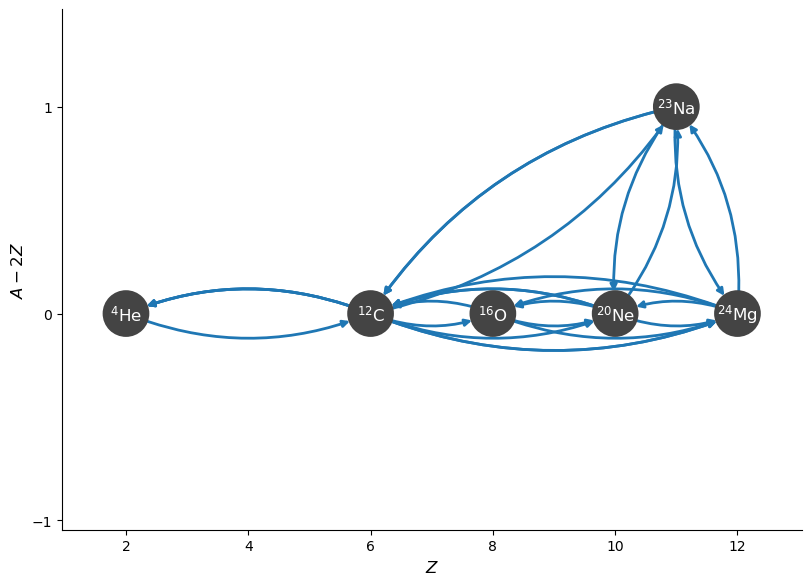

In [11]:
rc = pyna.RateCollection(libraries=[mylib2])
fig = rc.plot(rotated=True, curved_edges=True, hide_xalpha=True)